[View in Colaboratory](https://colab.research.google.com/github/MicroprocessorX069/FirstRep/blob/master/CSE574_Project_1_1.ipynb)



---


Importing libraries, dependencies and frameworks


---



In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Software 1.0
 **fizzbuzz(n)**: #The  function returns either of the 4 classes["Fizz","Buzz","FizzBuzz","Other"] on taking any n as integer input by test of divisibility of 3, 5 or (3 and 5) respectively.
 If no. is divisible by 3: "Fizz"
 If no. is divisible by 5: "Buzz"
 If no. is divisible by 3 and divisible by 5: "FizzBuzz"
None of the above: "Other"
 
 **Input**: An integer 
 
 **Output**: : A String from ["Fizz","Buzz","FizzBuzz","Other"]

In [0]:
import pandas as pd

def fizzbuzz(n):
    
    #The  function returns either of the 4 classes["Fizz","Buzz","FizzBuzz","Other"] on taking any n as integer input.
    #It incorporates 3 conditions; divisible by 15 then "FizzBuzz", divisible by 3 then"Fizz" or divisible by 5 then "Buzz" else "Other"
    # x % y gives remainder when x is divided by y. 
    
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

Creating data set using software 1.0


In [0]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
 # Why do we have number 10?         
      #  Since the maximum no. is the dataset is 999, whole binary form is -
      #  0b1111100111, i.e. it requires 10 digits to store the number.
      
      #  dataInstance is right shifted 10 times and the right most bit is  -    # x >> y Shifts x by y bits right side. Basically x // (2**y) 
      #  appended to the dataset by 'and'ing with index of the digit to be -    # //  gives the whole number  of x/y. i.e. 10//3 is 3 since 10/3 is 3.333.
      #  extracted
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

from keras.utils import np_utils

def encodeOutput(y):
  processed_y=[]
                                                                                 
  for y_label in y:
    if(y_label=="Fizz"):
      processed_y.append([0])
    elif (y_label=="Buzz"):
      processed_y.append([1])
    elif (y_label=="FizzBuzz"):
      processed_y.append([2])
    else:
      processed_y.append([3])
      
  return(np_utils.to_categorical(np.array(processed_y),4))  



In [0]:
def createDataset(start,end):
    
    # Why list in Python?                                                       #Lists in python support varied function for easy retrieval of data. 
                                                                                #They are compatible with loops and supports varied indexing. 
                                                                                #In this problem, since the data is simple, integer type lists would be the best option for minimal computaion.

    inputData   = []
    outputData  = []
    
    # Why do we need training Data?                                             #Back propogation algorithm is a supervised learning algorithm. 
                                                                                #Training dataset is important for the model to learn from by regularly calculating the error function and updating the weights. This makes the model more accurate towards the intended result
    
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
   
    processedData  = encodeData(inputData)
    processedLabel = encodeOutput(outputData)
    
    return processedData, processedLabel
    
   
   

___
Functions definitions:
1. **createDataset(start, end)**: a. a. Segregates the dataset into input and output data. b. Processes input data interms of binary digits as individual features of thhe dataset. c. Processes output labelled data into factors as required by the algorithm. (Binary class factorization in this case . Example Suppose an output belongs to 2nd class out of 0, 1, 2, 3, it will be represented as 0 0 1 0)

**Input**: dataset: Multi data type dataframe. Ex. [ [ 101, 'Other' ], [ 103, 'Fizz' ] ]  for three classes (Fizz(0), Buzz(1), FizzBuzz(2), Other(3))

**Output**: Two datasets of binary input and output lists of repective lengths.  Ex. processedData=[ [1,0,1,0,0,1,1,0,0,0] , [1,0,1,1,0,1,1,0,0,0] ]; processedLabel [ [0,0,0,1], [1,0,0,0] ].
  
*///Example. of  processData([101, Other]) illustrated within the code as comments, stepwise.*

2. **encodeData(data)**: Converts a given list of integer numbers to binary bits and stores each bit as an element of row of a dataframe.

**Input**: dataset: Integer data type list. Ex. [ 101, 103 , 104 ]

**Output**: datasets of binary 2D list( no. of columns defined in the function).  Ex. processedData=[ [1,0,1,0,0,1,1,0,0,0] , [1,0,1,1,0,1,1,0,0,0], [1,0,0,1,0,1,1,0,0] ]

3. **encodeLabel(data)**: Converts a given list of factor(Any datatype) to list of binary bits (length= number of unique classes).

**Input**:  List. Ex. [ 'Other', 'Fizz', 'Buzz' ]

**Output**: List of integer (1 or O) ( Length is the total no. of unique classes in the dataset).  Ex. [ [0,0,0,1], [1,0,0,0], [0,1,0,0] ]


                 

**Importing data set from Google drive/cloud**

This part of the code is for running the model on Google colaboratory.
For authentication.

In [19]:
'''
# Code to authenticate the user to let the model access google drive and cloud. 
#For importing datasets from google drive
#[1]

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
'''

'\n# Code to authenticate the user to let the model access google drive and cloud. \n#For importing datasets from google drive\n#[1]\n\n!apt-get install -y -qq software-properties-common python-software-properties module-init-tools\n!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null\n!apt-get update -qq 2>&1 > /dev/null\n!apt-get -y install -qq google-drive-ocamlfuse fuse\nfrom google.colab import auth\nauth.authenticate_user()\nfrom oauth2client.client import GoogleCredentials\ncreds = GoogleCredentials.get_application_default()\nimport getpass\n!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL\nvcode = getpass.getpass()\n!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}\n'

Mounting Google drive for importing the data.

In [20]:
'''
#[1]
#!mkdir -p drive
!google-drive-ocamlfuse drive
'''


'\n#[1]\n#!mkdir -p drive\n!google-drive-ocamlfuse drive\n'

___
**Segregating the test and train data**



In [0]:
import pandas as pd

### THe below commented code accesses the files from google drive from the given path. This is subjective to the respective google account.
#train_df=pd.read_csv('drive/path/to/your/Google driv folder/training.csv') #th path start with "drive/"
#test_df=pd.read_csv('drive/path/to/your/Google driv folder/testing.csv')

# Calling functions to create, segregate datasets into train and test.
#The target labels of the datasets are also factorized.

processedData, processedLabel = createDataset(101,1000) # processedData and processedLabel are the input features and target values of the train dataset.
                                                        # The train data has input integers from 101 to 999(inclusive).
processedTestData,processedTestLabel=createDataset(1,101) # processedData and processedLabel are the input features and target values of the train dataset.
                                                          # The test data has input integers from 1 to 100 (inclusive).


# Model parameters
Initializing model parameters for tuning the model via an interactive real-time form. Following are the parameters:

1. No. of hidden layers. (Name: no_of_layers, Type: Integer, Range: N.A. (feasible for computation) )
2. No. of nodes in each hidden layer (Name: nodes_in_layer[i], Type: Integer, Range: N.A. (feasible for computation) )
3. Validation split of the dataset( in terms of per unit) (Name: validation_splitt, Type: Float, Range: (0,1))
4. Activation Function: (Name: Activation_function, Select: [tf.nn.relu, tf.nn.relu6, tf.nn.crelu, tf.nn.elu, tf.nn.selu, tf.nn.softplus, tf.nn.softsign, tf.nn.dropout, tf.nn.bias_add, tf.sigmoid, tf.tanh])
5. Loss Function (Name: loss_function, Select: "categorical_crossentropy", "sparse_categorical_crossentropy", "binary_crossentropy","kullback_leibler_divergence","poisson","cosine_proximity" )
6. Optimizer : (Name: optimizer_used, Select: "SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", " Adamax", "Nadam", "TFOptimizer")

[2]

In [0]:
#@title Parameters for the model { run: "auto" } 

import tensorflow as tf
#run:auto command makes the code block run in real time. Whenever the user amends the input, the block runs automatically for the new set of input.
no_of_layers= 3 #@param {type:"slider", min:0, max:10, step:1}
# A is the list of nodes_in_each_hidden_layer for each of the user defined hidden layers. Eg. A=[128,256,64] implies 3 hidden layers with 128 nodes, 256 nodes and 64 nodes respectively starting from the input layer to the output layer.
A=[]
# No. of nodes in hidden layer 1
nodes_in_layer1 = 64 #@param {type:"integer"}
A.append(nodes_in_layer1)
#dropout_rate = 0.1 #@param {min:0.000,max:1.000}

nodes_in_layer2 = 256 #@param {type:"integer"}
A.append(nodes_in_layer2)
nodes_in_layer3 = 128 #@param {type:"integer"}
A.append(nodes_in_layer3)
validation_splitt=0.2 #@param{type:"slider",min:0.000,max:1.000,step:0.05}
Activation_function = tf.nn.crelu #@param ["relu", "relu6", "crelu", "elu", "selu", "softplus", "softsign", "dropout", "bias_add", "sigmoid", "tanh"]
loss_function = 'kullback_leibler_divergence' #@param ["categorical_crossentropy", "sparse_categorical_crossentropy", "binary_crossentropy","kullback_leibler_divergence","poisson","cosine_proximity"]
optimizer_used = 'SGD' #@param ["SGD", "RMSprop", "Adagrad","Adadelta","Adam","Adamax","Nadam","TFOptimizer"]




---


# **Model Creation**



---



In [23]:
#@title Parametres for the model { run: "auto" }

#no_epochs is the integer input for total no. of model parsing -
#from input to generating output and back to updating the weights -
#according to the error for all training examples.

no_epochs=1000 #@param{type:"slider",min:0,max:10000,step:200}
 
import time
start=time.time()

#Libraries for current codeblock
import tensorflow as tf
from tensorflow import nn
nodes_in_output_layer=4
input_size=10

model=tf.keras.models.Sequential()

#Various types of layers in keras: Dense, Flatten, Input, Permute, Reshape.[3]
#Dense implements the operation: output = activation(dot(input, kernel) + bias)[3]

#Adding input layer with size of input i.e. 10 in this case. 
#The first parameter for function Dense() is No. of nodes. in the layer. model.add appends the newly created hidden layer to the model.

model.add(tf.keras.layers.Dense(A[0],activation=Activation_function,input_dim=input_size))
for layer_iterator in range(1,len(A)-1):
  model.add(tf.keras.layers.Dense(A[layer_iterator+1], activation=Activation_function))
#Creating dropout layer
#model.add(tf.keras.layers.Dropout(rate=dropout_rate))
# Creating the output layer with 4 nodes. Since Output layer 
model.add(tf.keras.layers.Dense(nodes_in_output_layer, activation=tf.nn.softmax))

# Parameters for model creation i.e. optimizers, loss function
                                                                                # metric: Accuracy. Accuracy is the measure of correctness of the model
                                                                                # - , basically rate to which it classifies the inputs correctly.
                                                                                # Validation Accuracy: Percentage of correctly classifying on input chosen from the train dataset itself.
                                                                                # Testing Accuracy:  Percentage of correctly classifying on input from a new dataset following the same problem as the train dataset.

                                                                                # Optimizer: Algorithm to minimize the error/loss by updating weights to improve the training of the model. e.g.
model.compile(optimizer=optimizer_used, loss=loss_function, metrics=['accuracy'])
model.summary()
history=model.fit(processedData, processedLabel, epochs= no_epochs, validation_split= validation_splitt)

end=time.time()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               704       
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 1028      
Total params: 18,244
Trainable params: 18,244
Non-trainable params: 0
_________________________________________________________________
Train on 719 samples, validate on 180 samples
Epoch 1/1000
719/719 [==============================] - 0s 284us/step - loss: 1.2623 - acc: 0.4951 - val_loss: 1.1779 - val_acc: 0.5333
Epoch 2/1000
719/719 [==============================] - 0s 52us/step - loss: 1.1797 - acc: 0.5341 - val_loss: 1.1494 - val_acc: 0.5333
Epoch 3/1000
719/719 [==============================] - 0s 57us/step - loss: 1.1592 -

Loss Accuracy and time


In [24]:
#If Validation accuracy is lower than training accuracy, implies overfitting.


#model.evaluate returns the loss value & metrics values for the model
loss,acc=model.evaluate(processedTestData,processedTestLabel)
print("Loss=",loss,"\nAccuracy=",acc)
time_taken=end-start
print("Time Taken=",end-start)



100/100 [==============================] - 0s 78us/step
Loss= 0.34101722240447996 
Accuracy= 0.82
Time Taken= 41.25078225135803


Visualisation

In [25]:
'''
#!pip install gspread
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

sh = gc.open_by_key('1gfvIG0NSh1N4tTfOMoXbMxprQP_n6QC_sG6Y3nrvZgI')
# Open our new sheet and add some data.
#worksheet = sh.worksheet("Sheet1")
#metric_list =[nodes_in_layer1,nodes_in_layer2,nodes_in_layer3,acc,loss,time_taken] 
#worksheet.append_row(metric_list, value_input_option='RAW')

#worksheet = sh.worksheet("Activation_function")
#Activation_fn_metrics =[Activation_function.__name__,acc,loss,time_taken] 
#worksheet.append_row(Activation_fn_metrics, value_input_option='RAW')


#worksheet = sh.worksheet("Loss_function")
#loss_fn_metrics =[loss_function,acc,loss,time_taken] 
#worksheet.append_row(loss_fn_metrics, value_input_option='RAW')


worksheet = sh.worksheet("Optimizer")
Optimizer_metrics =[optimizer_used,acc,loss,time_taken] 
worksheet.append_row(Optimizer_metrics, value_input_option='RAW')
'''

'\n#!pip install gspread\nfrom google.colab import auth\nauth.authenticate_user()\nimport gspread\nfrom oauth2client.client import GoogleCredentials\ngc = gspread.authorize(GoogleCredentials.get_application_default())\n\nsh = gc.open_by_key(\'1gfvIG0NSh1N4tTfOMoXbMxprQP_n6QC_sG6Y3nrvZgI\')\n# Open our new sheet and add some data.\n#worksheet = sh.worksheet("Sheet1")\n#metric_list =[nodes_in_layer1,nodes_in_layer2,nodes_in_layer3,acc,loss,time_taken] \n#worksheet.append_row(metric_list, value_input_option=\'RAW\')\n\n#worksheet = sh.worksheet("Activation_function")\n#Activation_fn_metrics =[Activation_function.__name__,acc,loss,time_taken] \n#worksheet.append_row(Activation_fn_metrics, value_input_option=\'RAW\')\n\n\n#worksheet = sh.worksheet("Loss_function")\n#loss_fn_metrics =[loss_function,acc,loss,time_taken] \n#worksheet.append_row(loss_fn_metrics, value_input_option=\'RAW\')\n\n\nworksheet = sh.worksheet("Optimizer")\nOptimizer_metrics =[optimizer_used,acc,loss,time_taken] \nwork

**Visualisation**

Standard deviation to check the stability of the model's accuracy and loss


acc         0.193957
loss        0.424726
val_acc     0.149805
val_loss    0.327252
dtype: float64


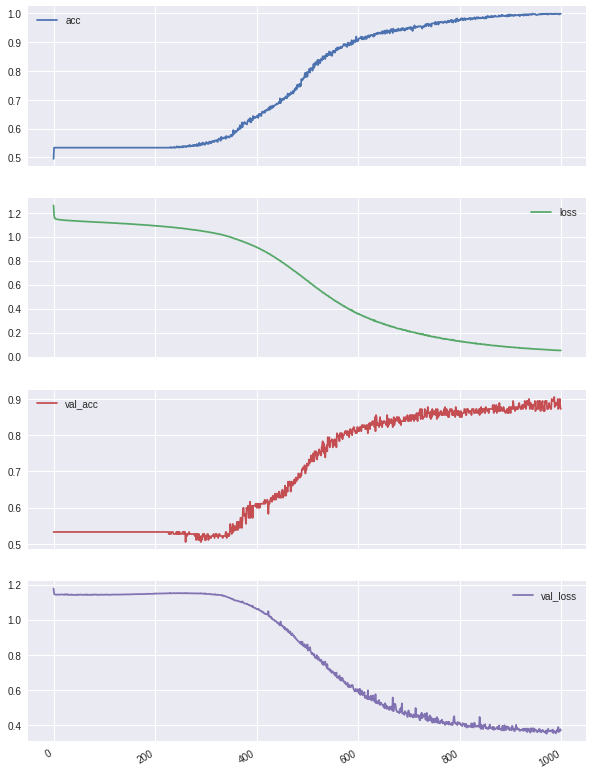

In [26]:

%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))
print(np.std(df))

In [34]:
#print(model.predict(processedTestData))
#predictedTestLabel is the output labels of teset dataset as classes 0,1,2,3
predictedTestLabel = []
for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(y.argmax())


#processedTestLabel2 for storing the target labels of test dataset as classes 0,1,2,3
processedTestLabel2=[]
for Label in processedTestLabel:
  processedTestLabel2.append(Label.argmax())


#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(processedTestLabel2,predictedTestLabel)
print(cm)


[1, 3, 0, 3, 1, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 1, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 0, 1, 0, 3, 1, 0, 0, 3, 3, 3, 3, 2, 0, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 3, 0, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 1, 0, 0]
[3, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 1, 3, 0, 3, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 0, 1]
[[25  0  0  2]
 [ 5  9  0  0]
 [ 1  0  5  0]
 [ 5  5  0 43]]


In [0]:
#Exporting the output.csv

def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

predictedTestLabel2=[]
for Label in predictedTestLabel:
  predictedTestLabel2.append(decodeLabel(Label))

processedTestLabel3=[]
for Label in processedTestLabel2:
  processedTestLabel2.append(decodeLabel(Label))
  
testDataInput = processedTestData
testDataLabel = processedTestLabel3

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel2

print(processedTestLabel3)
#opdf = pd.DataFrame(output)
#opdf.to_csv('output.csv')